In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 선형 회귀

- y_hat = T(theta)*X
- 회귀의 성능 측정 지표 MSE : 오차 제곱의 평균

#### 정규방정식
비용 함수를 최소화하는 theta 값을 얻는 수학 공식을 정규방정식이라고 한다
- theta_hat = ( T(X)*X )^(-1) * T(X) * y

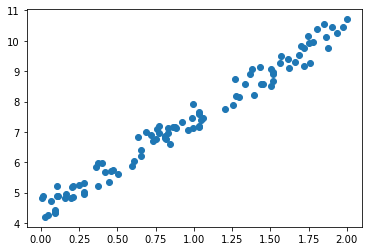

In [7]:
import numpy as np

X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.rand(100,1)
plt.scatter(X, y,)

In [8]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0=1 추가 #np.ones((100,1)) 는 1이 100개인 배열
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.40178027],
       [3.05558144]])

[[ 4.40178027]
 [10.51294316]]


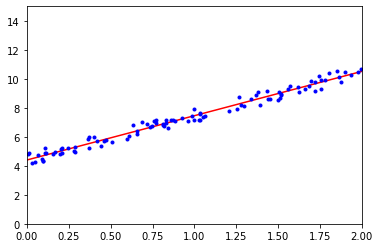

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [12]:
# 위와 같은 작업을 하는 사이킷런 코드
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print()
print(lin_reg.predict(X_new))

[4.40178027] [[3.05558144]]

[[ 4.40178027]
 [10.51294316]]


#### 계산 복잡도
특성 수를 n, 훈련 세트의 샘플 수를 m이라 하면
O(n^(2.4)) , O(m)

## 경사 하강법
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- 파라미터 벡터 theta에 대해 비용 함수의 현재 그래디언트를 계산하고, 그래디언트가 감소하는 방향으로 진행된다. 그래디언트가 0이 되면 최솟값에 도달한 것이다
- theta를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수(예를 들면 MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다


- 경사하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정된다
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸리고, 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다(너무 통통 튐)


- 비용 함수는 그릇 모양을 하고 있지만, 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. 경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 아니면 수렴하는 데 훨씬 오래 걸림

#### 배치 경사 하강법
- 각 모델 파라미터 theta(j)에 대해 비용 함수의 그래디언트 즉, theta(j)가 조금 변경될 때 미용함수가 얼마나 바뀌는지 계산해야 함(편도 함수)
- 파라미터 theta(j)에 대한 비용 함수의 편도함수 : (MSE를 theta에 대해 미분한 결과라고 생각하면 될 것 같다)
- 비용 함수의 그래디언트 벡터 = (2/m) * X_T * (X*theta - y)


- 위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 하므로 마이너스를 해줌, 
- theta(next step) = theta - (learning rate)*(비용함수의 그래디언트 벡터)

In [13]:
eta = 0.1 #학습률
n_iterations =1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.40178024],
       [3.05558147]])

적절한 학습률을 찾으려먼 그리드 탐색을 사용한다.

하지만 그리드 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다

반복 횟수를 아주 크게 지정하고, 그래디언트 벡터가 허용 오차보다 작아지면 알고리즘 중지

#### 확률적 경사 하강법
- 매 스텝에서 전체 훈련세트를 사용해 그래디언트를 계산하는 배치 경사 하강법과 달라, 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산함
- 알고리즘이 훨씬 빠름
- 매우 큰 훈련 세트도 훈련시킬 수 있음


- 그러나 이는 배치 경사 하강법보다 훨씬 불안정
- 비용 함수가 매우 불규칙하면 지역 최솟값을 건너뛸 수도 있기 때문에, 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음


- 전역 최솟값에 다다르기 위해 학습률을 점진적으로 감소시키는 것이 좋음
- 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함
- 매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 함

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta

array([[4.40292058],
       [3.04162444]])

In [18]:
# 사이킷런에서 SGD 바익으로 선형회귀 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #max_iter : 에포크, eta0 : 학습률
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.39356052]), array([3.06390012]))

#### 미니배치 경사 하강법
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산
- 확률적 경사 하강법보다 좋은 점은, 행렬 연산에 최적화된 하드웨어, 즉 GPU를 사용해 얻는 성능 향상